---
title: Sketch and Solve
description: Simple randomized approach to linear regression using sketching to reduce problem size
keywords: [sketch and solve, linear regression, Gaussian sketch, subspace embedding, residual bounds, active regression]
numbering:
  equation:
    enumerator: 4.%s
    continue: true
  proof:theorem:
    enumerator: 4.%s
    continue: true
  proof:algorithm:
    enumerator: 4.%s
    continue: true
  proof:definition:
    enumerator: 4.%s
    continue: true
  proof:proposition:
    enumerator: 4.%s
    continue: true
---

The sketch-and-solve paradigm is perhaps the simplest randomized approach to the linear regression problem {eq}`task-regression`.
This method produces a low-accuracy solution, so it is only suitable for special computational problems where alternatives are not viable. 
Nevertheless, it is pedagogically important. 

:::{prf:algorithm} Sketch and Solve
**Input:** $\vec{A}$, $\vec{b}$, sketching dimension $k$

1. Sample $\vec{S}\sim\Call{Sketch}(k,n)$
1. Obtain a solution $\widehat{\vec{x}}$ to the least-squares problem $\min_{\vec{x}} \|\vec{S}\vec{b} - \vec{S}\vec{A}\vec{x}\|$

**Output:** $\widehat{\vec{x}}$
:::

We would like to choose the sketching matrix $\vec{S}$ so that the solution $\widehat{\vec{x}}$ is nearly optimal, in the sense that
```{math}
:label: eqn-sketch-and-solve-guarantee
\|\vec{b}-\vec{A}\widehat{\vec{x}}\| \approx \|\vec{b}-\vec{A}\vec{x}^*\|,
```
where $\vec{x}^*$ is the solution to {eq}`task-regression`.
Such a guarantee on the residual is equivalent to a bound on the error.
:::{prf:theorem}
Let $\vec{x}^*$ be the solution to {eq}`task-regression`.
It holds that
\begin{equation*}
\|\vec{A}(\vec{x}^* - \widehat{\vec{x}})\| = \left(\|\vec{b} - \vec{A}\widehat{\vec{x}}\|^2 - \|\vec{b} - \vec{A}\vec{x}^*\|^2\right)^{1/2}.
\end{equation*}
:::


:::{prf:proof}
:class: dropdown
:enumerated: false

Note that the true residual $\vec{b} - \vec{A}\vec{x}^*$ is orthogonal to the range of $\vec{A}$; i.e., $\vec{A}^\T(\vec{b} - \vec{A}\vec{x}^*) = \vec{0}$. 
Thus, for any $\tilde{\vec{x}} \in \R^n$, by the Pythagorean theorem,
\begin{equation*}
\begin{aligned}
\|\vec{b} - \vec{A}\tilde{\vec{x}}\|^2 
&= \|\vec{b} - \vec{A}(\vec{x}^* + \tilde{\vec{x}} - \vec{x}^*)\|^2
\\&= \| \vec{b} - \vec{A}\vec{x}^* - \vec{A}(\vec{x}^* - \tilde{\vec{x}}) \|^2
\\&= \|\vec{b} - \vec{A}\vec{x}^*\|^2 + \|\vec{A}(\vec{x}^* - \tilde{\vec{x}})\|^2.
\end{aligned}
\end{equation*}
Rearranging, we find that
\begin{equation*}
\|\vec{A}(\vec{x}^* - \tilde{\vec{x}})\| = \left(\|\vec{b} - \vec{A}\tilde{\vec{x}}\|^2 - \|\vec{b} - \vec{A}\vec{x}^*\|^2\right)^{1/2}.
\end{equation*}
:::

### Active Regression

An important setting where sketch-and-solve is particularly useful is the [active regression](../07-Sampling-Based-Methods/active-regression.ipynb) problem.
In this task, the cost of the problem is measured by the number of entries of $\vec{b}$ that we observe. 
By using a subsampling sketch, we can solve the active regression problem by observing only a few entries of $\vec{b}$.
We discuss this problem in more detail in the Chapter on [Sampling Based Methods](../07-Sampling-Based-Methods/intro.md) that discusses how to use sketch-and-solve to solve the active regression problem.

## The Gaussian case

To get a handle on the sketch-and-solve algorithm, we will consider the case where the sketching matrix $\vec{S}$ is a Gaussian random matrix.
Note that using a Gaussian sketch results in an algorithm that is not computationally efficient, so other [mixing-based sketching methods](../02-Sketching/mixing-sketches.md) should be used in practice. 

:::{prf:theorem}
Let $\vec{S}$ be a Gaussian random matrix with $k$ rows and $n$ columns, and let $\vec{A} \in \R^{m\times n}$ and $\vec{b} \in \R^m$.
Then $\EE[\widehat{\vec{x}}] = \vec{x}^*$ and
\begin{equation*}
\EE\left[ \|\vec{b} - \vec{A}\widehat{\vec{x}}\|^2 \right] \leq \left(1+\frac{d}{k-d-1}\right) \|\vec{b} - \vec{A}\vec{x}^*\|^2.
\end{equation*}
:::

Thus we see we solve {eq}`eqn-sketch-and-solve-guarantee` when $k = O(d/\varepsilon)$.

:::{prf:proof}
:class: dropdown
:enumerated: false

Decompose
\begin{equation*}
\vec{b} = \vec{A}\vec{A}^+ \vec{b} + (\vec{b} - \vec{A}\vec{A}^+ \vec{b} )
= \vec{A}\vec{x}^* + \vec{r},
\end{equation*}
where $\vec{r} = \vec{b} - \vec{A}\vec{x}^*$ is the residual vector.
We can then write 
\begin{equation*}
\widehat{\vec{x}} = \vec{x}^* + (\vec{S}\vec{A})^+ \vec{S}(\vec{b} - \vec{A}\vec{A}^+ \vec{b} ).
\end{equation*}
Let $\vec{U}_1$ be an orthonormal basis for the range of $\vec{A}$ and and $\vec{U}_2$ be an orthonormal basis for the orthogonal complement of the range of $\vec{A}$.
Decompose
\begin{equation*}
\vec{S} = \vec{S}_1\vec{U}_1^\T + \vec{S}_2\vec{U}_2^\T,
\qquad 
\vec{S}_1 = \vec{S}\vec{U}_1,
\quad
\vec{S}_2 = \vec{S}\vec{U}_2,
\end{equation*}
Since $[\vec{U}_1 \, \vec{U}_2]$ is an orthogonal matrix, by the [Gaussian orthogonal invariance property](../02-Sketching/Gaussian-sketch.ipynb#prop:gaussian-orthogonal-invariance), we have that $\vec{S}_1\sim \Call{Gaussian}(k,d)$ and $\vec{S}_2\sim \Call{Gaussian}(k,n-d)$ are independent.
Moreover, by the optimality of $\vec{x}^*$, $\vec{r}$ is orthogonal to the range of $\vec{A}$.
Hence, 
\begin{equation*}
\widehat{\vec{x}} = \vec{x}^* + (\vec{S}_1\vec{U}_1^\T\vec{A})^+ \vec{S}_2\vec{U}_2^\T\vec{r}.
\end{equation*}
Therefore,
\begin{equation*}
\EE[\widehat{\vec{x}}] = \vec{x}^* + \EE[(\vec{S}_1\vec{U}_1^\T\vec{A})^+] \EE[\vec{S}_2]\vec{U}_2^\T\vec{r} = \vec{x}^*.
\end{equation*}

Next, note that 
\begin{equation*}
\begin{aligned}
\|\vec{b} - \vec{A}\widehat{\vec{x}}\|^2
&=\ \| \vec{r}  + \vec{A}(\vec{S}_1\vec{U}_1^\T\vec{A})^+ \vec{S}_2\vec{U}_2^\T\vec{r}\|^2
\\&= \|\vec{r}\|^2 + \|\vec{A}(\vec{S}_1\vec{U}_1^\T\vec{A})^+ \vec{S}_2\vec{U}_2^\T\vec{r}\|^2,
\\&= \|\vec{r}\|^2 + \|\vec{U}_1^\T\vec{A}(\vec{S}_1\vec{U}_1^\T\vec{A})^+ \vec{S}_2\vec{U}_2^\T\vec{r}\|^2,
\\&= \|\vec{r}\|^2 + \|\vec{S}_1^+ \vec{S}_2\vec{U}_2^\T\vec{r}\|^2,
\end{aligned}
\end{equation*}
where we used the fact that $\vec{r}$ is orthogonal to the range of $\vec{A}$, the [Pythagorean theorem](https://en.wikipedia.org/wiki/Pythagorean_theorem#Inner_product_1paces) and orthogonal invariance of the Euclidean norm, and an identity for the psuedoinverse.

Finally, by a [direct computation](../02-Sketching/Gaussian-sketch.ipynb#prop:gaussian-inverse) and the [Pythagorean theorem](https://en.wikipedia.org/wiki/Pythagorean_theorem#Inner_product_1paces) and orthogonal invariance of the Euclidean norm
\begin{equation*}
\EE[\|\vec{S}_1^+ \vec{S}_2\vec{U}_2^\T\vec{r}\|^2]
= \EE[ \| \vec{S}_1 \|_\F^2 ] \|\vec{U}_2^\T\vec{r}\|^2
= \frac{d}{k-d-1} \|\vec{r}\|^2.
\end{equation*}
Combining the above equations gives the result.
:::

A similar proof can be found on Ethan's [blog](https://www.ethanepperly.com/index.php/2024/11/19/note-to-self-sketch-and-solve-with-a-gaussian-embedding/).

## Bounds based on Subspace Embeddings

If $\vec{S}$ is a subspace embedding, then it is easy to see that the solution $\widehat{\vec{x}}$ returned by the sketch-and-solve algorithm is accurate:

:::{prf:theorem} 
:label: thm-sketch-and-solve
Suppose $\vec{S}$ is an $\varepsilon$-subspace embedding for $[\vec{A},\vec{b}]$.
The solution $\widehat{\vec{x}}$ returned by the sketch-and-solve algorithm is nearly optimal in the sense that
\begin{equation*}
\|\vec{b}-\vec{A}\widehat{\vec{x}}\| \leq \frac{1+\varepsilon}{1-\varepsilon}\|\vec{b}-\vec{A}\vec{x}^*\|.
\end{equation*}
:::

:::{prf:proof}
:class: dropdown
:enumerated: false

Observe that, for any $\vec{z}\in\R^{d}$, $\vec{b} - \vec{A}\vec{z} \in \range([\vec{A}, \vec{b}])$ and hence, since $\vec{S}$ is a  subspace embedding for $[\vec{A},\vec{b}]$, we have
\begin{equation*}
(1-\varepsilon)\|\vec{b} - \vec{A}\vec{z}\|\leq \| \vec{S}(\vec{b} - \vec{A}\vec{z}) \| \leq (1+\varepsilon)\|\vec{b} - \vec{A}\vec{z}\|.
\end{equation*}
Therefore,
\begin{equation*}
\begin{aligned}
\|\vec{b} - \vec{A}\widehat{\vec{x}}\| 
&\leq \frac{1}{1-\varepsilon} \|\vec{S}(\vec{b} - \vec{A}\widehat{\vec{x}})\| \\
\\&= \frac{1}{1-\varepsilon} \min_{\vec{x}} \|\vec{S}(\vec{b} - \vec{A}\vec{x})\|
\\&\leq \frac{1+\varepsilon}{1-\varepsilon} \min_{\vec{x}} \|\vec{b} - \vec{A}\vec{x}\|.
\\&= \frac{1+\varepsilon}{1-\varepsilon} \|\vec{b} - \vec{A}\vec{x}^*\|.
\end{aligned}
\end{equation*}
:::
### A more refined bound

While the proof of {prf:ref}`thm-sketch-and-solve` is extremely simple, it does not recover the rate predicted by our analysis of the Gaussian case (recall a Gaussian matrix is a $\varepsilon$ subspace embedding when $k = O(d/\varepsilon^2)$).
In fact, as outlined on Ethan's [blog](https://www.ethanepperly.com/index.php/2025/02/12/note-to-self-how-accurate-is-sketch-and-solve/), a more careful analysis actually yields a quadratically better rate
\begin{equation*}
\|\vec{b}-\vec{A}\widehat{\vec{x}}\| \leq (1+4\varepsilon^2 + O(\varepsilon^3)) \min_{\vec{x}} \|\vec{b}-\vec{A}\vec{x}\|.
\end{equation*}
Explicit bounds are available.

## Numerical Experiment

Let's look at the accuracy of the sketch-and-solve algorithm as a function of the sketching dimension $k$ for the different [mixing](../02-Sketching/mixing-sketches.md)-based sketches.

In [3]:
import numpy as np
import scipy as sp
from scipy import fft,sparse
import pandas as pd
import time
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from randnla import *

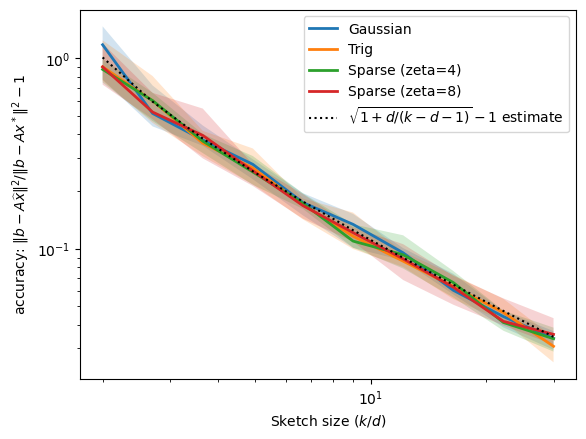

In [11]:
# ========================
# Set up the test problem
# ========================
n = 2**16
d = 100

U, s, Vt = np.linalg.svd(np.random.rand(n, d), full_matrices=False)
s = np.geomspace(1e-4, 1, d)  # Controlled singular values for numerical stability
A = U @ np.diag(s) @ Vt

b_norm = 1
residual_norm = .1

v = np.random.randn(n)
v_span = U @ (U.T @ v)
v_perp = v - v_span
v_span /= np.linalg.norm(v_span)
v_perp /= np.linalg.norm(v_perp)

b = v_span * np.sqrt(b_norm**2 - residual_norm**2) + v_perp * residual_norm


# ========================
# Now run the experiment
# ========================
sketch_methods = {
    'Gaussian': {
        'func': lambda k,rng: gaussian_sketch(n,k,rng),
    },
    'Trig': {
        'func': lambda k,rng: trig_sketch(n,k,rng),
    },
    'Sparse (zeta=4)': {
        'func': lambda k,rng: sparse_stack_sketch(n,k,4,rng),
    },
    'Sparse (zeta=8)': {
        'func': lambda k,rng: sparse_stack_sketch(n,k,8,rng),
    },
}

ks = np.geomspace(2*d,3000,10,dtype=int)

n_repeat = 10
results = {}

for method_name, method_info in sketch_methods.items():

    errors = np.zeros((n_repeat,len(ks)))
    for i in range(n_repeat):
        rng = np.random.RandomState(i)
        for j,k in enumerate(ks):
        
            S = method_info['func'](k,rng)
            
            x = np.linalg.lstsq(S@A,S@b,rcond=None)[0]
            errors[i,j] = np.linalg.norm(b-A@x)

    results[method_name] = {
        'error': errors,
    }
# ========================
# Plot the results
# ========================
 
σ = 0.1

for method_name, method_info in sketch_methods.items():
    # Get the error data for this problem and method
    error = results[method_name]['error']
    
    bot, mid, top = np.quantile(error, [σ, .5, 1-σ], axis=0)
    plt.plot(ks/d, mid**2/residual_norm**2-1, label=method_name, linewidth=2)
    plt.fill_between(ks/d, bot**2/residual_norm**2-1, top**2/residual_norm**2-1, alpha=.2)

# Theoretical bound
plt.plot(ks/d, d/(ks-d-1), ls=':', color='k', label=r'$d/k$ estimate')

plt.ylabel(r'accuracy: $\|b-A\widehat{x}\|^2/\|b-Ax^*\|^2 - 1$')
plt.xlabel('Sketch size ($k/d$)')
plt.yscale('log')
plt.xscale('log')
plt.legend()

Similar to as we observed in our [numerical study](../02-Sketching/which-sketch-should-i-use.ipynb) of the embedding dimension, all sketching distributions behave very similarly to the Gaussian sketch.